<a href="https://colab.research.google.com/github/jeevansbote/IPL/blob/main/classification_of_drug_side_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name Of The Student:**Jeevan Sunil Bote

**Internship Project Topic:**	Classification Model - Build a Model the Classifies the Side Effects of a Drug

**Name of the Organization	TCS RIO 125** - Classification Model - Build a Model that Classifies the Side Effects of a Drug

**Name of the Industry Mentor:**	Debashis Roy

**Name of the Institute**:	B.K Birla college










In [ ]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import altair as alt
import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading Dataset

In [ ]:
data = pd.read_csv('/content/webmd.csv', escapechar='\\', error_bad_lines=False)




Skipping line 33968: expected 12 fields, saw 16



In [ ]:
data

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1.0,Male,,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78080,65-74,Exercise-Induced Bronchospasm Prevention,5/29/2017,montelukast sodium granules in packet,6478,4,1,Does nothing for my exercise induced Asthma,1.0,Male,,0.0
78081,45-54,Pain,4/27/2009,"morphine tablet,oral only, extended release",327,5,4,Morphine has been the only medication that has...,4.0,Female,"Nausea , vomiting , constipation , sweating...",4.0
78082,45-54,Pain,12/11/2008,"morphine sulfate er capsule, extended release ...",327,4,4,I have been taking ms sufate for many years no...,4.0,Male,"Nausea , vomiting , constipation , lighthea...",4.0
78083,45-54,Pain,4/26/2009,morphine sulfate er,327,5,5,I have been on some sort of morphine for 8 yrs...,4.0,Female,"Nausea , vomiting , constipation , lighthea...",5.0


#### Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

In [ ]:
data.info()

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,78085.000000,78085.000000,78085.000000,78084.000000,78084.000000
mean,35014.367663,4.038778,3.510751,3.102044,6.391527
std,51688.463921,1.302493,1.434043,1.596019,8.657180
min,63.000000,1.000000,1.000000,1.000000,0.000000
25%,2798.000000,3.000000,3.000000,1.000000,1.000000
50%,6873.000000,5.000000,4.000000,3.000000,4.000000
75%,63990.000000,5.000000,5.000000,5.000000,9.000000
max,178044.000000,5.000000,5.000000,5.000000,154.000000


## Name and race column addition

In [ ]:
pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 15.5 MB/s eta 0:00:00


In [ ]:
from mimesis import Person
person = Person('en')

# function to create names to exact rows
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name

names = fake_names(362806)

data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

data_name.head()

,Name
0,Laurena
1,Tora
2,Clemente
3,Kim
4,Soo


In [ ]:
import random

options = [("White", 0.32), ("Hispanic", 0.28), ("Black", 0.22), ("Asian", 0.18)]
words = []

for i in range(362806):
    word = random.choices([o[0] for o in options], [o[1] for o in options])[0]
    words.append(word)

data_race=pd.DataFrame(words, columns = ['Race'])

data_race.head()

,Race
0,Black
1,Hispanic
2,Asian
3,White
4,Black


In [ ]:
data1 = pd.concat([data_name, data_race, data], axis=1).reindex(data.index)
data1.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Laurena,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,Tora,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,Clemente,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,Kim,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,Soo,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,,1.0


# Dataset is ready for EDA and Preprocessing

# A drug named Lisinopril solution with DrugId 6873 is selected in building a classification model to determine side effects

In [ ]:
data2 = data1[data1.DrugId == 6873]

# Missing Value Handling

In [ ]:
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Nan rows were dropped
data2.dropna(axis = 0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with whitespaces
for i in data2:
    data2[i]=np.where(data2[i]==" ",np.NAN,data2[i])

data2.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
dtype: int64

In [ ]:
data2.dropna(axis=0, inplace = True)
data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with double whitespaces
for i in data2:
    data2[i]=np.where(data2[i]=="  ",np.NAN,data2[i])

data2.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# Checking each column values

## Sex

In [ ]:
data2.Sex.value_counts()

Female    4060
Male      2466
Name: Sex, dtype: int64

## Age

In [ ]:
data2.Age.value_counts()

55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: Age, dtype: int64

## Date

In [ ]:
data2['Year'] = pd.to_datetime(data2['Date'], errors='coerce').dt.year
data2['Month'] = pd.to_datetime(data2['Date'], errors='coerce').dt.month
data2['day_of_week'] = pd.to_datetime(data2['Date'], errors='coerce').dt.day_name()

In [ ]:
data2.head(5)

## Year, Month and Day of week column generated

## Useful Count

5.09650737167029

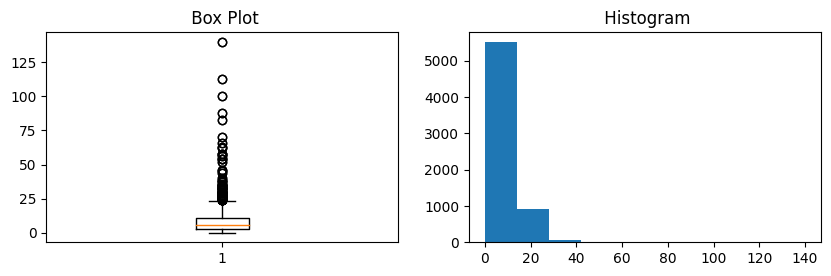

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["UsefulCount"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["UsefulCount"])
plt.title(" Histogram")
data2.UsefulCount.skew()

0.13539917023288633

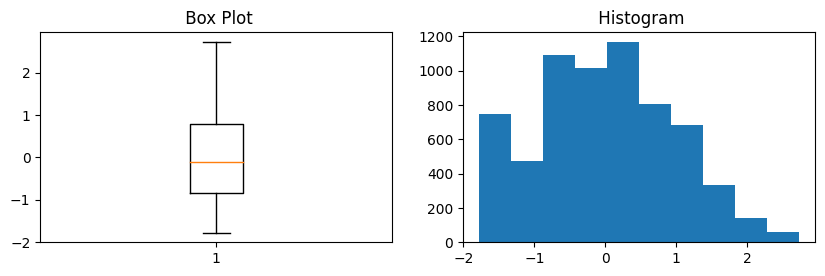

In [ ]:
data_Usefulcount = pd.DataFrame(data2['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")

data2['UsefulCount_boxcox'] = data_Usefulcount1
data2['UsefulCount_boxcox'].skew()

## EaseofUse

-1.0956719032464681

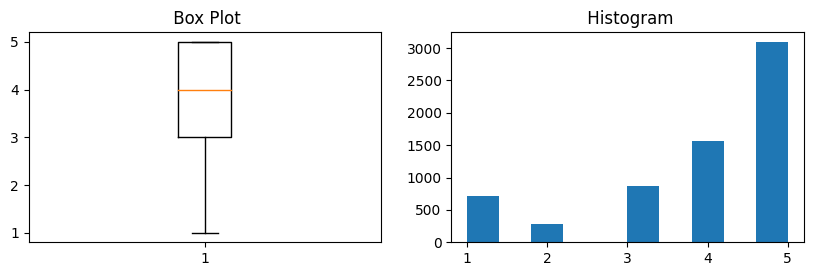

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["EaseofUse"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["EaseofUse"])
plt.title(" Histogram")
data2.EaseofUse.skew()

-0.4695297334699221

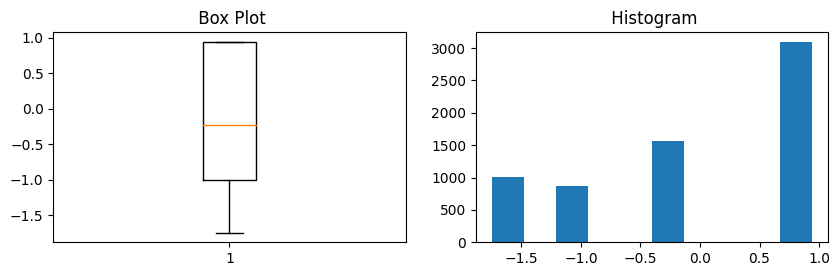

In [ ]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(data2['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")

data2['EaseofUse_boxcox'] = data_EaseofUse1
data2.EaseofUse_boxcox.skew()

## Satisfaction column

0.46899147382396195

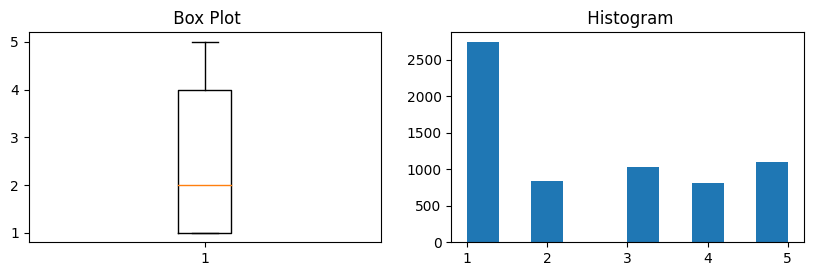

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["Satisfaction"])
plt.title(" Histogram")
data2.Satisfaction.skew()

## Effectiveness

-0.35269982353771245

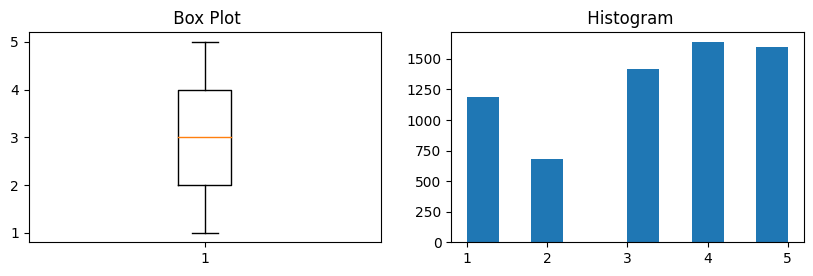

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data2["Effectiveness"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data2["Effectiveness"])
plt.title(" Histogram")
data2.Effectiveness.skew()

### After checking the skewness and outliers, Usefulcount, easeofuse, effectiveness and satisfaction column has been processed

# New Feature creation: Sideeffect

In [ ]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
data2['Sideeffect'] = data2['Satisfaction'].map(mapping)
# data2.loc[data2['Satisfaction'] == 1, 'Sideeffect'] = data2.loc[data2['Satisfaction'] == 1,5, 'Sideeffect']

In [ ]:
data2.columns

# Exploratory Data Analysis

## Top 20 Drugs based on No. of Users

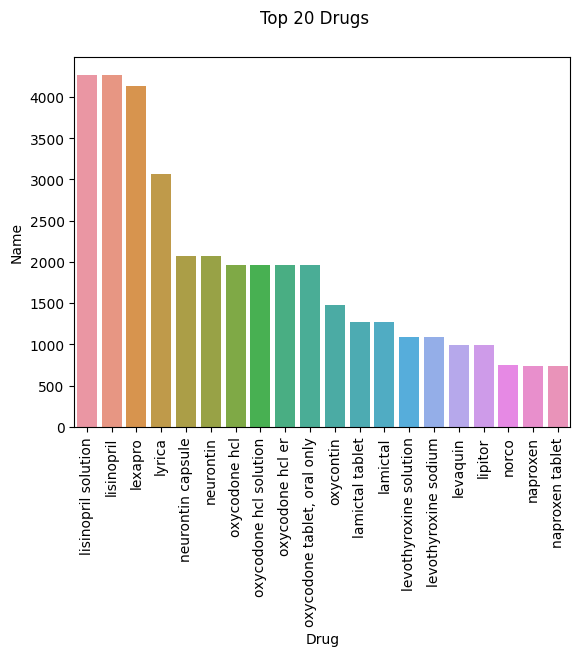

In [ ]:
data_= data['Drug'].value_counts().head(20).reset_index()
data_.columns = ['Drug', 'Name']
sns.barplot(data=data_, x = 'Drug', y = 'Name')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

#### Cymbalta tops the list followed by Lisinopril. It is to be noted that all the 20 drugs has been used by more than atleast 2000 people

## Top 15 Conditions

Text(0, 0.5, 'Users')

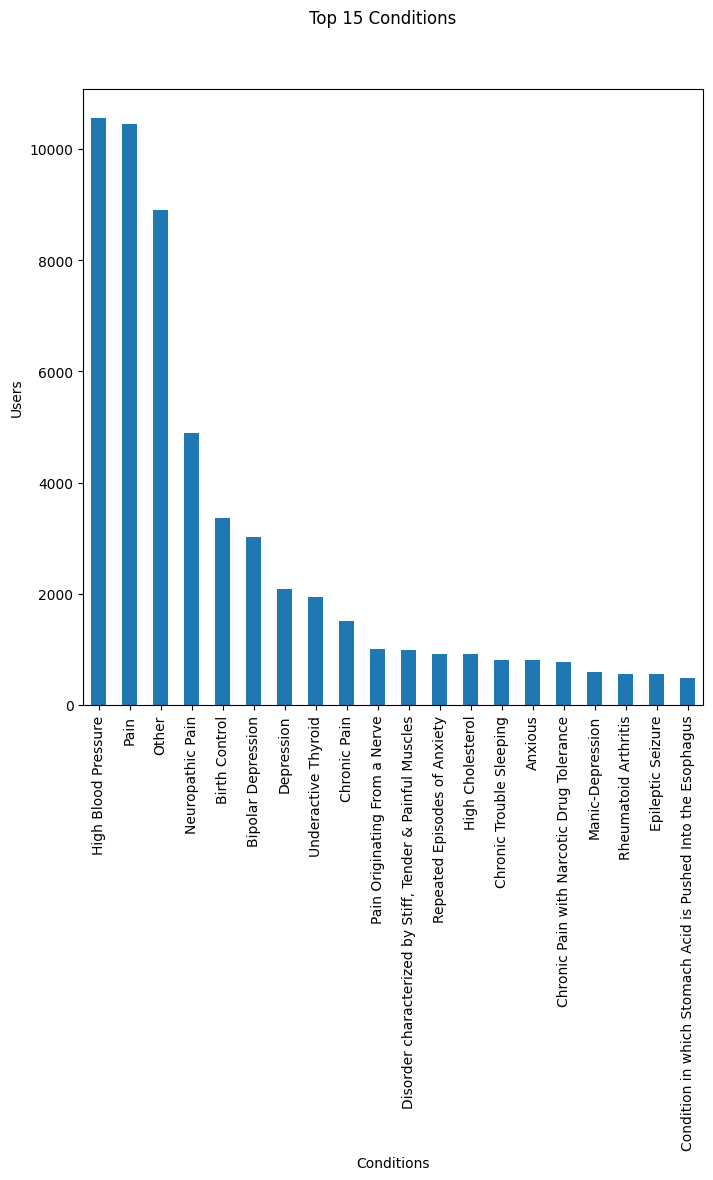

In [ ]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

#### As much as 50,000 users have reported other conditions followed by Pain topped the list with more than 25000 people reporting it.

# EDA on Licinopril

## Which gender is the predominant user?

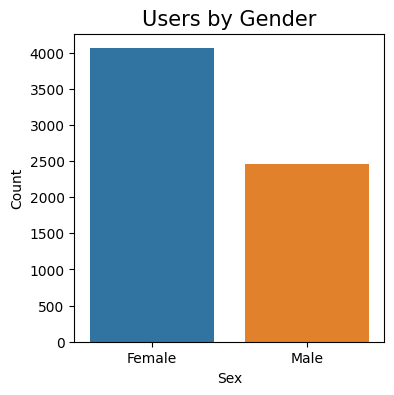

In [ ]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data2)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#### Female users are predominant

#### Which race is the predominant user?

Text(0, 0.5, 'Count')

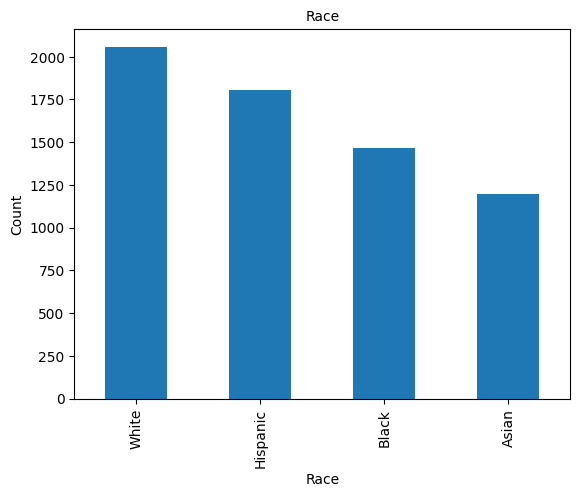

In [ ]:
data2['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

#### In each race, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Race and Gender')

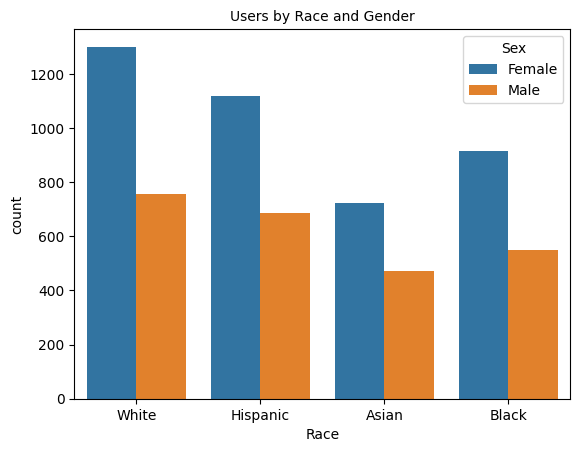

In [ ]:
sns.countplot(x='Race',hue='Sex',data=data2)
plt.title("Users by Race and Gender", fontsize = 10)

#### In each age group, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Age and Gender')

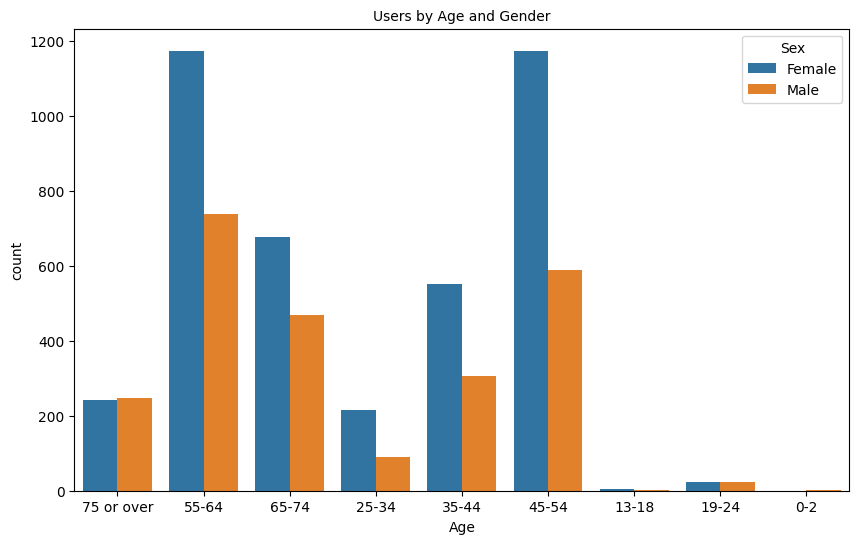

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data2)
plt.title("Users by Age and Gender", fontsize = 10)

#### In each year, how many reviews were collected?

Text(0, 0.5, 'Count of Reviews')

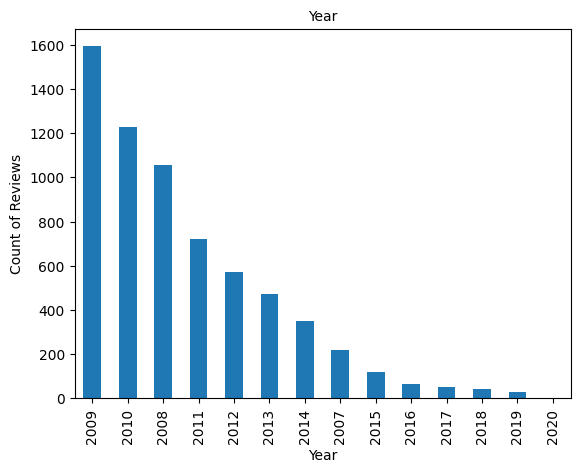

In [ ]:
data2['Year'].value_counts().plot(kind='bar')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

#### In each year, there is a gradual decrease in user reviews

#### how effective is the drug?

Text(0, 0.5, 'Count')

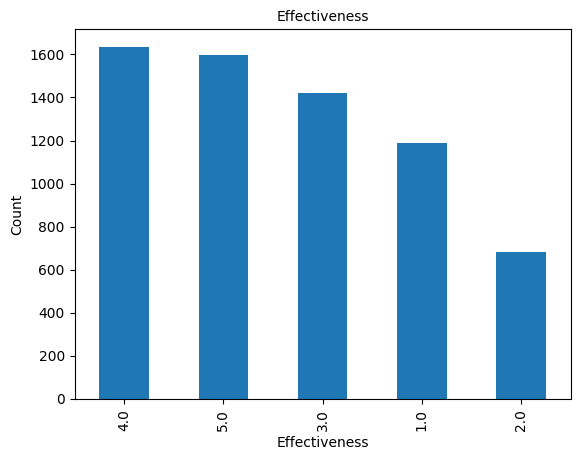

In [ ]:
data2['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

#### The drug is fairly effective with around 1600 users voting a 4 rating to it.

#### How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

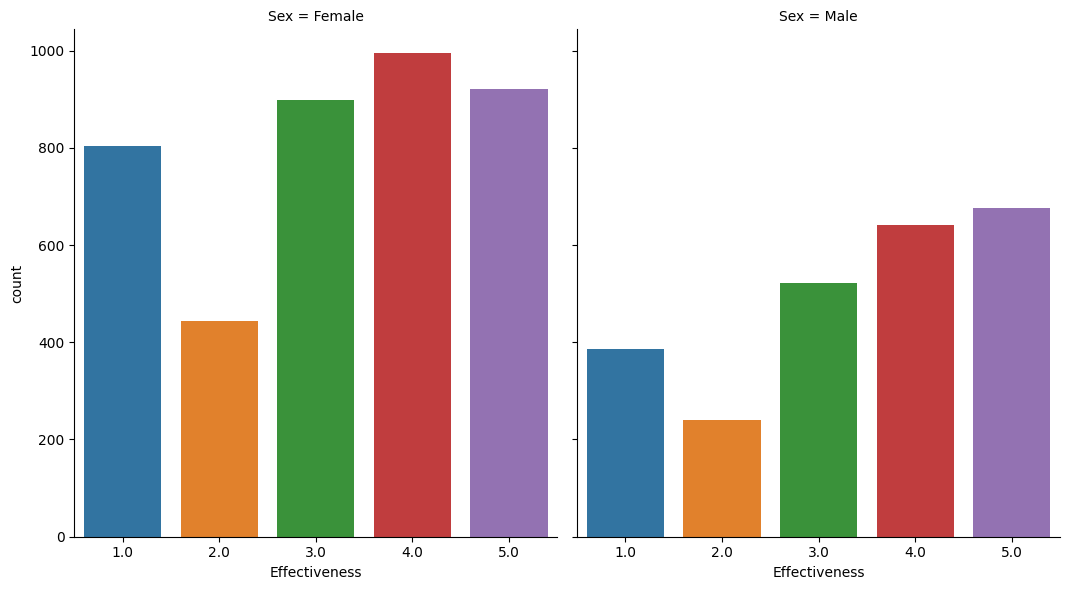

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data2, kind="count",
                height=6,aspect =.9);

#### Both the users have given a mixed response

#### How many reported side effects for the drug?

In [ ]:
plt.figure(figsize=(6,6))
data2['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

#### 42% users reported extreme sideeffects with 1 being no side effect and 5 being extreme side effect

#### Which age group has reported most side effect?

<Axes: xlabel='Age', ylabel='count'>

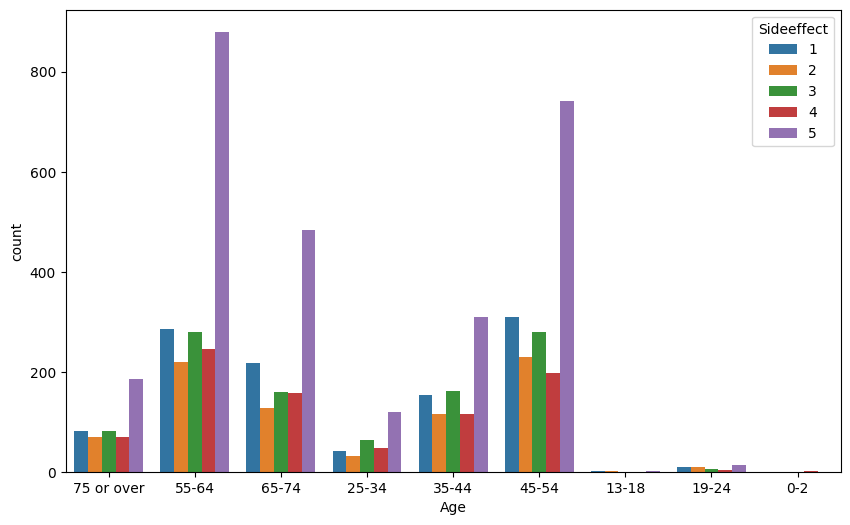

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=data2)

#### 55-64 age group has opinionated that they had extreme side effects

#### Among both the gender category, how is the sideeffects of the drug?

<Figure size 2000x1000 with 0 Axes>

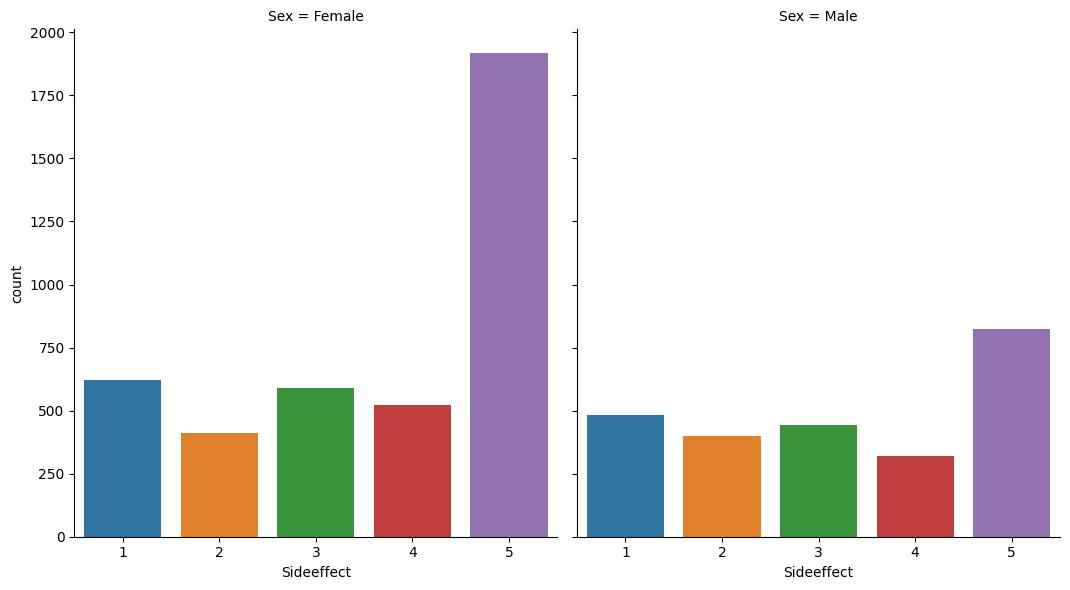

In [ ]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=data2, kind="count",height=6,aspect =.9);

#### Female users have reported more extreme side effects

#### which race has reported extreme side effects?

<Axes: xlabel='Race', ylabel='count'>

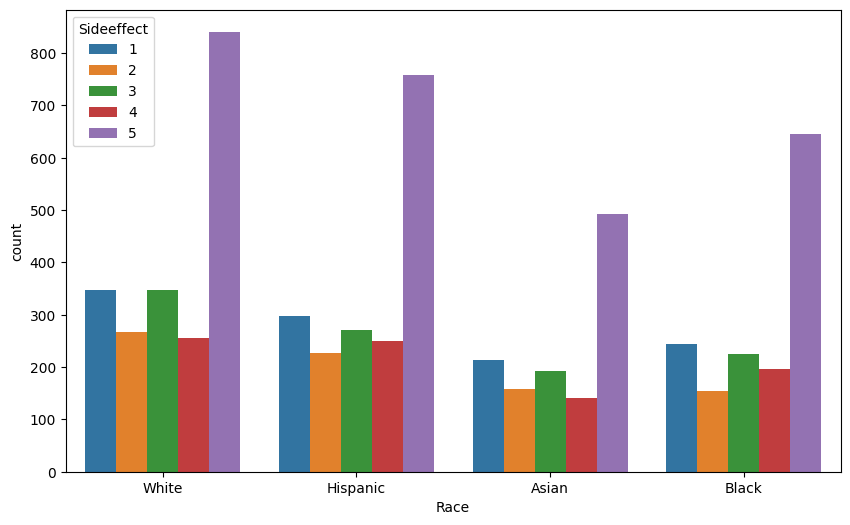

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=data2)

#### White and Hispanic users reported more extreme side effects

## Reviews

#### Let us look at a sample of Review

In [ ]:
data2.Reviews.sample(5)

14130    This drug is awful, developed horrible cough, ...
13568    Cant sleep because of a choking feeling, and p...
12744    No matter how much I reduce my food intake, I ...
13406                                   weak feeling,dizzy
11851    Brought BP down quickly but made me tired and ...
Name: Reviews, dtype: object

#### Let us define a function to clean the text in the review so as to generate meaningfull output. The plan is to rank the reviews as either positive or negative. But, so as to rank the reviews, we need a more samples than what we have here. So, we will train the algoithm on the complete parent dataset (containing data about all the medicines). The algorithm will get trained on satisfaction and reviews, which means, it will identify which reviews or specifically word consitutes positive review ( satisfaction > 3) and which one consitute negative reviews (satisfaction < 3). Then, the generated model will be used to generate review rank ( 1 for positve and 0 for negative) for us in our dataset. Kindly note, the review rank for entries where satisfaction > 3 is 1 and for satisfaction < 3 is 0. The entries with satisfaction == 3 will be fed to the model to generate review rank values. Finally, our dataset will be complete after this.

# Cleaning the Global Review column

In [ ]:
if data['Reviews'].dtype.kind == "O":
        data['Reviews'] = data['Reviews'].str.strip()

In [ ]:
data['Reviews']= data['Reviews'].astype(str)

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
%%time

import nltk
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))


def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    """Cleans up text"""

    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""

        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]

        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
            text = text.replace(e, placeholder_neg)
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))

mldf = data[["Satisfaction", "Reviews"]]
mldf["Reviews"] = mldf["Reviews"].apply(clean_review)

# remove any rows with new empty strings following the clean-up
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
# adding indexes as "index" column for later use to recreate same splits
mldf.reset_index(inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 5min 41s, sys: 1.05 s, total: 5min 42s
Wall time: 5min 47s


#### Review column is cleaned. A new column satisfaction1 is generated which will help in identifiying postive and negative reviews for algorithm where 0 is negative, 2 is positive and 1 is neutral for satisfaction < 3, > 3 and ==3 respectively. We will omit the neutral reviews.

In [ ]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

mldf["Satisfaction1"] = mldf["Satisfaction"].apply(relabel)

# Generating Text processing Model

In [ ]:
train_set, test_set = train_test_split(mldf, test_size=0.25, random_state=0, stratify=mldf["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index
print(train_set.shape)
print(test_set.shape)

(50777, 4)
(16926, 4)


In [ ]:
%%time
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]
print(train_set.shape)
print(test_set.shape)

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"\nAccuracy in train set: {acc_train:.2}")
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.2}\n")
print(classification_report(y_test, predictions))

(43527, 4)
(14510, 4)

Accuracy in train set: 0.99

Accuracy in test  set: 0.86

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6931
           2       0.86      0.87      0.87      7579

    accuracy                           0.86     14510
   macro avg       0.86      0.86      0.86     14510
weighted avg       0.86      0.86      0.86     14510

CPU times: user 2min 2s, sys: 1.61 s, total: 2min 4s
Wall time: 2min 4s


#### We got an accuracy of 83%.

#### Let us the clean the review specific to our drug

In [ ]:
data2["Reviews"] = data2["Reviews"].apply(clean_review)

#### Let us the rank the reviews by creating a function for the same

In [ ]:

def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1

def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1

# predict_rank("I loved it")
data2['Reviews_Rank'] = data2['Satisfaction']
data2.loc[data2['Satisfaction'] < 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
data2.loc[data2['Satisfaction'] > 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
data2.loc[data2['Satisfaction'] == 3, 'Reviews_Rank'] = data2.loc[data2['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)
data2['Reviews_Rank'].unique()

array([1., 0.])

#### Columns Name has unique values so will be dropped. Drug, DrugId, Condition, Date, Easeofuse, usefulcount, sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients.

In [ ]:
data2.drop(['Name','Condition','Date','Drug','DrugId','EaseofUse','Sides','UsefulCount'], axis=1, inplace = True)

In [ ]:
data2.Month = data2.Month.astype(str)
data2.Year = data2.Year.astype(str)
data_encod = data2[['Race', 'Age','Sex','Month','day_of_week']]
data_num = data2[['Effectiveness']]
data2.columns

Index(['Race', 'Age', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect', 'Reviews_Rank'],
      dtype='object')

# Encoding : One Hot Encoding

In [ ]:
data_encod = pd.get_dummies(data_encod)
data_encod

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_7,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
9203,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9209,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9227,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18982,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Scaling : Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
data_num = mm.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns = ['Effectiveness'])
data_num

,Effectiveness
0,0.517259
1,1.226128
2,1.226128
3,0.517259
4,-1.609348
...,...
6521,-1.609348
6522,-1.609348
6523,1.226128
6524,-1.609348


In [ ]:
data3 = data_encod
data3['Effectiveness'] = data_num.values
data3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness
9203,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.517259
9209,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.226128
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.226128
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.517259
9227,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,-1.609348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,-1.609348
18982,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-1.609348
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1.226128
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,-1.609348


#### So finally what I suppose is the following features which are race, age, review rank and effectiveness can form the dataset which will predict the sideeffect of the user.

In [ ]:
data3 = data_encod
data3['Effectiveness'] = data_num.values
data3['Reviews_Rank'] = data2.Reviews_Rank
data3['UsefulCount_boxcox'] = data_Usefulcount1
data3['EaseofUse_boxcox'] = data_EaseofUse1
data3

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness,Reviews_Rank,UsefulCount_boxcox,EaseofUse_boxcox
9203,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0.517259,1.0,-0.835439,0.943255
9209,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1.226128,1.0,-0.835439,-0.231105
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1.226128,1.0,-0.102133,0.943255
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.517259,0.0,0.918562,-1.480793
9227,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.609348,0.0,1.837785,-1.004962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,-1.609348,0.0,1.551731,-1.480793
18982,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,-1.609348,0.0,0.918562,0.943255
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1.226128,1.0,-0.835439,0.943255
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,-1.609348,0.0,0.631664,-1.746405


# data3 froms our final dataset

In [ ]:
data4 = pd.DataFrame(data2['Sideeffect'])
data4

,Sideeffect
9203,2
9209,2
9215,1
9221,4
9227,5
...,...
18981,5
18982,5
18984,2
18985,5


# data4 forms target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3,data4,test_size=0.25, random_state = 42, stratify=data4)

# Log Regression

In [ ]:
#log regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)

[[240  35   1   0   0]
 [ 50 140  12   0   0]
 [ 15  51  82  14  97]
 [  0   0  33  12 165]
 [  0   0  34  29 622]]
0.6715686274509803
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       276
           2       0.62      0.69      0.65       202
           3       0.51      0.32      0.39       259
           4       0.22      0.06      0.09       210
           5       0.70      0.91      0.79       685

    accuracy                           0.67      1632
   macro avg       0.57      0.57      0.55      1632
weighted avg       0.61      0.67      0.63      1632



# SVM Polynomial

In [ ]:
#SVM polynomial
from sklearn.svm import SVC
svm_clf_p = SVC(kernel='poly', degree = 4, probability=True)
svm_model = svm_clf_p.fit(X_train, Y_train)
y_pred_svmp = svm_clf_p.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmp))
print(accuracy_score(Y_test, y_pred_svmp))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmp)
print(report)

[[236  37   3   0   0]
 [ 30 156  16   0   0]
 [ 12  32 128   4  83]
 [  0   0  24  46 140]
 [  0   0  21   8 656]]
0.7487745098039216
              precision    recall  f1-score   support

           1       0.85      0.86      0.85       276
           2       0.69      0.77      0.73       202
           3       0.67      0.49      0.57       259
           4       0.79      0.22      0.34       210
           5       0.75      0.96      0.84       685

    accuracy                           0.75      1632
   macro avg       0.75      0.66      0.67      1632
weighted avg       0.75      0.75      0.72      1632



# SVM RBF

In [ ]:
#svm rbf
from sklearn.svm import SVC
svm_clf_r = SVC(kernel='rbf', degree = 4, probability=True)
svm_model = svm_clf_r.fit(X_train, Y_train)
y_pred_svmr = svm_clf_r.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmr))
print(accuracy_score(Y_test, y_pred_svmr))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr)
print(report)


[[235  40   1   0   0]
 [ 35 159   8   0   0]
 [ 15  47  97   8  92]
 [  0   0  31  24 155]
 [  0   0  22  10 653]]
0.7156862745098039
              precision    recall  f1-score   support

           1       0.82      0.85      0.84       276
           2       0.65      0.79      0.71       202
           3       0.61      0.37      0.46       259
           4       0.57      0.11      0.19       210
           5       0.73      0.95      0.82       685

    accuracy                           0.72      1632
   macro avg       0.68      0.62      0.61      1632
weighted avg       0.69      0.72      0.67      1632



In [ ]:
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_test shape: (1632, 38)
Y_test shape: (1632, 1)


In [ ]:
print("Type of Y_train:", type(Y_train))
print("Number of dimensions in Y_train:", np.ndim(Y_train))
Y_train_flat = np.ravel(Y_train)
print("Class distribution in Y_train:", np.bincount(Y_train_flat))




Type of Y_train: <class 'pandas.core.frame.DataFrame'>
Number of dimensions in Y_train: 2
Class distribution in Y_train: [   0  828  606  775  632 2053]


In [ ]:
class_distribution_values = np.bincount(Y_train_flat)[1:]  # Exclude the zero at the beginning
print("Class distribution values:", class_distribution_values)


Class distribution values: [ 828  606  775  632 2053]


# kNN

Fitting model with k=3
Predicting on test data
Accuracy for k=3: 0.47549019607843135
Fitting model with k=4
Predicting on test data
Accuracy for k=4: 0.4834558823529412
Fitting model with k=5
Predicting on test data
Accuracy for k=5: 0.5263480392156863
Fitting model with k=6
Predicting on test data
Accuracy for k=6: 0.5428921568627451
Fitting model with k=7
Predicting on test data
Accuracy for k=7: 0.5428921568627451
Fitting model with k=8
Predicting on test data
Accuracy for k=8: 0.5618872549019608
Fitting model with k=9
Predicting on test data
Accuracy for k=9: 0.5643382352941176
Fitting model with k=10
Predicting on test data
Accuracy for k=10: 0.5637254901960784
Fitting model with k=11
Predicting on test data
Accuracy for k=11: 0.5692401960784313
Fitting model with k=12
Predicting on test data
Accuracy for k=12: 0.5784313725490197
Fitting model with k=13
Predicting on test data
Accuracy for k=13: 0.5955882352941176
Fitting model with k=14
Predicting on test data
Accuracy for k=14: 

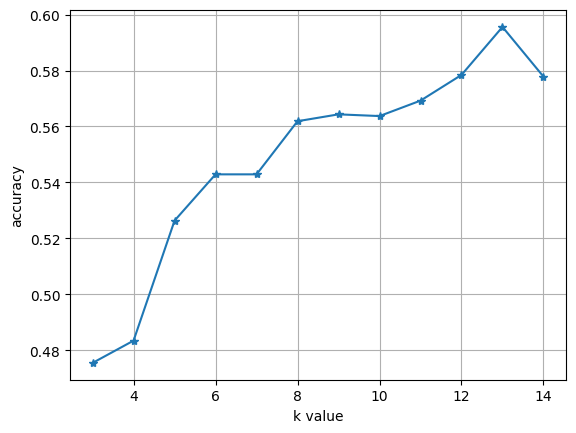

In [ ]:
metric_k = []
neighbours = np.arange(3, 15)

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(f"Fitting model with k={k}")
    model_knn = knn.fit(X_train, Y_train)

    print("Predicting on test data")
    Y_pred_knn = model_knn.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred_knn)
    metric_k.append(acc)

    print(f"Accuracy for k={k}: {acc}")

plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [ ]:
print("Shape of X_test:", X_test.shape)
from sklearn.preprocessing import StandardScaler



Shape of X_test: (1632, 38)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Decision Tree

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtm_clf = DecisionTreeClassifier(random_state = 42)
dtm_clf.fit(X_train, Y_train)
y_pred_dtm = dtm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_dtm))
print(accuracy_score(Y_test, y_pred_dtm))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_dtm)
print(report)

[[230  34  12   0   0]
 [ 26 157  19   0   0]
 [  7  14 200  12  26]
 [  0   0  23 148  39]
 [  0   0  29  45 611]]
0.8247549019607843
              precision    recall  f1-score   support

           1       0.87      0.83      0.85       276
           2       0.77      0.78      0.77       202
           3       0.71      0.77      0.74       259
           4       0.72      0.70      0.71       210
           5       0.90      0.89      0.90       685

    accuracy                           0.82      1632
   macro avg       0.79      0.80      0.79      1632
weighted avg       0.83      0.82      0.83      1632



# Random forest

In [ ]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 42)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)


[[253  21   2   0   0]
 [ 20 175   7   0   0]
 [ 10  22 181  11  35]
 [  0   0   9 139  62]
 [  0   0  14  14 657]]
0.8609068627450981
              precision    recall  f1-score   support

           1       0.89      0.92      0.91       276
           2       0.80      0.87      0.83       202
           3       0.85      0.70      0.77       259
           4       0.85      0.66      0.74       210
           5       0.87      0.96      0.91       685

    accuracy                           0.86      1632
   macro avg       0.85      0.82      0.83      1632
weighted avg       0.86      0.86      0.86      1632



# HyperTuning Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [1, 10, 100], 'criterion': ['gini', 'entropy'], 'min_samples_leaf' : list(range(25, 100)), 'min_samples_split': [2, 3, 4], 'max_features': ['auto','log2']}
rfc_tuned = RandomForestClassifier()
model_tuning_RF = GridSearchCV(rfc_tuned, param_grid=params, verbose=1, cv=3, scoring = 'recall')
grid_rf_metrics = model_tuning_RF.fit(X_train, Y_train)

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits


In [ ]:
print("Best: %f using %s" % (grid_rf_metrics.best_score_, grid_rf_metrics.best_params_))

Best: nan using {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 1}


In [ ]:
y_pred_rfm = model_tuning_RF.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

[[196  26  44   0  10]
 [ 83  46  58   0  15]
 [ 80  24  71   0  84]
 [ 29   6  34   0 141]
 [ 30   9  41   0 605]]
0.5625
              precision    recall  f1-score   support

           1       0.47      0.71      0.56       276
           2       0.41      0.23      0.29       202
           3       0.29      0.27      0.28       259
           4       0.00      0.00      0.00       210
           5       0.71      0.88      0.79       685

    accuracy                           0.56      1632
   macro avg       0.38      0.42      0.38      1632
weighted avg       0.47      0.56      0.51      1632



#### No best score obtained. So, let us choose 84%

# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
rid_clf = RidgeClassifier()
rid_clf.fit(X_train, Y_train)
y_pred_rid = rid_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rid))
print(accuracy_score(Y_test, y_pred_rid))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rid)
print(report)

[[274   2   0   0   0]
 [177  25   0   0   0]
 [ 59  39  11   8 142]
 [  0   0   8   8 194]
 [  0   0   1  17 667]]
0.6035539215686274
              precision    recall  f1-score   support

           1       0.54      0.99      0.70       276
           2       0.38      0.12      0.19       202
           3       0.55      0.04      0.08       259
           4       0.24      0.04      0.07       210
           5       0.67      0.97      0.79       685

    accuracy                           0.60      1632
   macro avg       0.47      0.43      0.36      1632
weighted avg       0.54      0.60      0.49      1632



# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, Y_train)
y_pred_bag = bag_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_bag))
print(accuracy_score(Y_test, y_pred_bag))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_bag)
print(report)

[[258  17   1   0   0]
 [ 27 164  11   0   0]
 [  9  30 177  21  22]
 [  0   0  16 156  38]
 [  0   0  35  33 617]]
0.8406862745098039
              precision    recall  f1-score   support

           1       0.88      0.93      0.91       276
           2       0.78      0.81      0.79       202
           3       0.74      0.68      0.71       259
           4       0.74      0.74      0.74       210
           5       0.91      0.90      0.91       685

    accuracy                           0.84      1632
   macro avg       0.81      0.81      0.81      1632
weighted avg       0.84      0.84      0.84      1632



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier()
grd_clf.fit(X_train, Y_train)
y_pred_grd = grd_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_grd))
print(accuracy_score(Y_test, y_pred_grd))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_grd)
print(report)

[[231  41   4   0   0]
 [ 35 152  15   0   0]
 [ 13  36 126  20  64]
 [  0   0  43  41 126]
 [  0   0  41  39 605]]
0.7077205882352942
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       276
           2       0.66      0.75      0.71       202
           3       0.55      0.49      0.52       259
           4       0.41      0.20      0.26       210
           5       0.76      0.88      0.82       685

    accuracy                           0.71      1632
   macro avg       0.64      0.63      0.63      1632
weighted avg       0.68      0.71      0.69      1632



#### Analysis Result:
#### Accuracy Values of each algorithm:
#### Logarithmic Regression: 67%
#### SVM Polynomial: 74%
#### SVM RBF: 71%
#### Decision Tree: 81%
#### kNN :  57%
#### Ridge : 59%
#### Bagging Classifier : 84%
#### GradientBoostingClassifier :  72%
#### Random Forest Classifier gave an accuracy of 86%. Hence, this model is selected